In [61]:
import os
import zipfile
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# [4월 13일]
---

## # 단어 임베딩
---

### # 정수 인코딩
---

#### # dictionary를 이용
---

In [62]:
text = '평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라.'

tokens = [x for x in text.split(' ')]
print(tokens, '\n')

unique = set(tokens)
unique = list(unique)
print(unique, '\n')

token2idx = {}
for i in range(len(unique)):
    token2idx[unique[i]] = i
print(token2idx, '\n')

encode = [token2idx[x] for x in tokens]
print(encode)

['평생', '살', '것처럼', '꿈을', '꾸어라.', '그리고', '내일', '죽을', '것처럼', '오늘을', '살아라.'] 

['꿈을', '오늘을', '그리고', '꾸어라.', '죽을', '평생', '살아라.', '살', '내일', '것처럼'] 

{'꿈을': 0, '오늘을': 1, '그리고': 2, '꾸어라.': 3, '죽을': 4, '평생': 5, '살아라.': 6, '살': 7, '내일': 8, '것처럼': 9} 

[5, 7, 9, 0, 3, 2, 8, 4, 9, 1, 6]


#### # keras를 이용
---
- 자동으로 단어 빈도가 높은 단의어 인덱스는 낮은 수로 설정

In [63]:
from tensorflow.keras.preprocessing.text import Tokenizer

text = '평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라.'

t = Tokenizer()
t.fit_on_texts([text]) # 텍스트로 이루어진 리스트를 넣는다.
print(t.word_index, '\n')

encoded = t.texts_to_sequences([text])[0]
print(encoded)

{'것처럼': 1, '평생': 2, '살': 3, '꿈을': 4, '꾸어라': 5, '그리고': 6, '내일': 7, '죽을': 8, '오늘을': 9, '살아라': 10} 

[2, 3, 1, 4, 5, 6, 7, 8, 1, 9, 10]


### # 원 핫 인코딩
---
- 정수 인코딩한 결과를 벡터로 변환하는 인코딩

#### # 조건문과 반복문을 이용
---

In [64]:
one_hot = []
for i in range(len(encoded)):
    temp = []
    for j in range(max(encoded)):
        if j == (encoded[i] - 1):
            temp.append(1)
        else:
            temp.append(0)
    one_hot.append(temp)

np.array(one_hot)

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

#### # keras를 이용
---

In [65]:
from tensorflow.keras.utils import to_categorical

one_hot = to_categorical(encoded)

one_hot

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## # IMDB 데이터
---

### # 데이터 로드
---

In [66]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

num_words = 1000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)

print(x_train.shape) # (25000,)
print(y_train.shape) # (25000,)
print(x_test.shape) # (25000,)
print(y_test.shape) # (25000,)
print()

print(x_train[0])
print(y_train[0])
print()

for i in range(10):
    if y_train[i] == 0:
        label = '부정'
    else:
        label = '긍정'
    print('{}\n{}'.format(x_train[i], label), '\n') # 첫 10개 리뷰에 대해서, 임베딩된 정수 리스트와 함께 긍정인지 부정인지 출력

17473536/17464789 [==============================] - 0s 0us/step
(25000,)
(25000,)
(25000,)
(25000,)

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1

[1, 14, 22, 16, 43, 530,

### # 데이터 전처리
---
- 모든 데이터를 같은 길이로 맞추기
- pad_sequence()
 - 데이터가 maxlen보다 길면 데이터를 자름
 - 데이터가 길면 padding 설정
 - pre : 데이터 앞에 0으로 채움
 - post : 데이터 뒤에 0으로 채움

In [67]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 100

pad_x_train = pad_sequences(x_train, maxlen = max_len, padding = 'pre') # 앞에서부터 패딩을 채움
pad_x_test = pad_sequences(x_test, maxlen = max_len, padding = 'pre')

# 전처리 확인하기
print(len(x_train[5])) # 43
print(len(pad_x_train[5]), '\n') # 100

print(len(x_train[1])) # 189
print(len(pad_x_train[1])) # 100

43
100 

189
100


### # 모델 구성 및 학습
---

In [68]:
model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 32, input_length = max_len))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 32)           32000     
                                                                 
 flatten_3 (Flatten)         (None, 3200)              0         
                                                                 
 dense_6 (Dense)             (None, 1)                 3201      
                                                                 
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history=model.fit(pad_x_train, y_train,
                  epochs = 10,
                  batch_size = 32,
                  validation_split = 0.2)

Epoch 1/10
625/625 [==============================] - 3s 3ms/step - loss: 0.5612 - acc: 0.7167 - val_loss: 0.4164 - val_acc: 0.8114
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3730 - acc: 0.8362 - val_loss: 0.3891 - val_acc: 0.8216
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3346 - acc: 0.8581 - val_loss: 0.3831 - val_acc: 0.8284
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3066 - acc: 0.8719 - val_loss: 0.3887 - val_acc: 0.8216
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2758 - acc: 0.8884 - val_loss: 0.4002 - val_acc: 0.8194
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2429 - acc: 0.9061 - val_loss: 0.4093 - val_acc: 0.8154
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2093 - acc: 0.9233 - val_loss: 0.4297 - val_acc: 0.8108
Epoch 8/10
625/625 [==============================] - 2s 3ms/step - loss: 0.

### # 검증 시각화
---

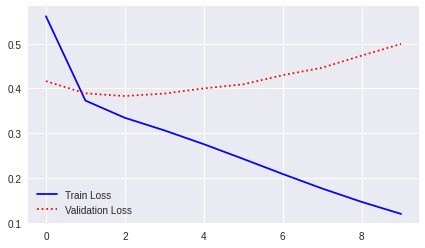

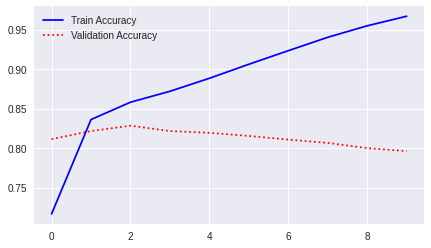

In [70]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

hist_dict = history.history
hist_dict.keys() # dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

plt.figure(figsize = (7, 4))
plt.plot(hist_dict['loss'], 'b-', label = 'Train Loss')
plt.plot(hist_dict['val_loss'], 'r:', label = "Validation Loss")
plt.legend()
plt.show()

plt.figure(figsize = (7, 4))
plt.plot(hist_dict['acc'], 'b-', label = 'Train Accuracy')
plt.plot(hist_dict['val_acc'], 'r:', label = "Validation Accuracy")
plt.legend()
plt.show()

# [4월 14일]
---

## # 임베딩부터 평가까지
---

### # 원본 IMDB 데이터 로드
---

In [71]:
# 현재 작업 경로 확인

%cd

/root


In [72]:
# 원본이 압축파일 형태이므로 전처리 필요

import zipfile
import os

# 압축파일 해제
zf = zipfile.ZipFile('/content/drive/MyDrive/workspace/cakd5/m9_딥러닝 알고리즘 구현/data/aclImdb.zip')
zf.extractall()
zf.close()

# 압축해제된 폴더에서 데이터 불러오기
imdb_dir = './aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)

    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding = 'utf8')
            texts.append(f.read())
            f.close()

            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

### # 데이터 토큰화
---

In [73]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_len = 100
num_words = 10000
training_samples = 200
validation_samples = 10000

tokenizer = Tokenizer(num_words = num_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print(f'{len(word_index)}개의 고유한 토큰을 찾았습니다.')

data = pad_sequences(sequences, maxlen = max_len)

labels = np.asarray(labels)
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

# 라벨이 0부터 순서대로 있으므로 랜덤으로 섞어준다
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples : training_samples + validation_samples]
y_val = labels[training_samples : training_samples + validation_samples]

88582개의 고유한 토큰을 찾았습니다.
데이터 텐서의 크기: (25000, 100)
레이블 텐서의 크기: (25000,)


### # GloVe 단어 임베딩 전처리
---
- GloVe 단어 임베딩 내려받기

  - https://nlp.stanford.edu/projects/glove 에서 2014년 영문 위키피디아를 사용해 사전에 계산된 임베딩을 내려받습니다. 이 파일의 이름은 glove.6B.zip이고 압축 파일 크기는 823MB입니다. 400,000만개의 단어(또는 단어가 아닌 토큰)에 대한 100차원의 임베딩 벡터를 포함하고 있습니다. datasets 폴더 아래에 파일 압축을 해제합니다.


In [74]:
# 임베딩 파일 파싱

import os
import numpy as np

glove_dir = '/content/drive/MyDrive/workspace/cakd5/m9_딥러닝 알고리즘 구현/data/'
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding = 'utf-8')

embeddings_index = {}
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype = 'float32')
    embeddings_index[word] = coefs
f.close()

print(f'{len(embeddings_index)}개의 단어 벡터')

400000개의 단어 벡터


In [75]:
# GloVe 단어 임베딩 행렬 준비

embedding_dim = 100 #차원

embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if i < num_words:
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector # 임베딩 인덱스에 없는 단어는 모두 0이 된다.

### # 모델 구성
---

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(num_words, embedding_dim, input_length = max_len))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_6 (Flatten)         (None, 10000)             0         
                                                                 
 dense_11 (Dense)            (None, 32)                320032    
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


### # 모델에 GloVe 임베딩 로드
---

In [93]:
# 사전 훈련된 단어 인베딩을 Embedding 층에 로드
# 사전 훈련된 층이 업데이트 되면 안되므로 동결처리

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

### # 모델 훈련과 평가
---

In [94]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/10
7/7 [==============================] - 1s 127ms/step - loss: 1.3991 - acc: 0.5500 - val_loss: 0.7494 - val_acc: 0.4976
Epoch 2/10
7/7 [==============================] - 1s 110ms/step - loss: 0.6429 - acc: 0.5850 - val_loss: 0.7152 - val_acc: 0.5009
Epoch 3/10
7/7 [==============================] - 1s 89ms/step - loss: 0.5664 - acc: 0.6850 - val_loss: 1.0054 - val_acc: 0.5023
Epoch 4/10
7/7 [==============================] - 1s 110ms/step - loss: 0.5632 - acc: 0.6900 - val_loss: 0.9238 - val_acc: 0.4981
Epoch 5/10
7/7 [==============================] - 1s 90ms/step - loss: 0.4395 - acc: 0.7750 - val_loss: 0.7893 - val_acc: 0.5115
Epoch 6/10
7/7 [==============================] - 1s 110ms/step - loss: 0.2764 - acc: 0.9000 - val_loss: 0.7154 - val_acc: 0.5455
Epoch 7/10
7/7 [==============================] - 1s 90ms/step - loss: 0.2626 - acc: 0.9000 - val_loss: 0.8893 - val_acc: 0.5083
Epoch 8/10
7/7 [==============================] - 1s 109ms/step - loss: 0.1060 - acc: 0.9950 

In [95]:
# 모델 저장

model.save_weights('/content/drive/MyDrive/workspace/cakd5/m9_딥러닝 알고리즘 구현/자연어 처리 (NLP)/pre_trained_glove_model.h5')

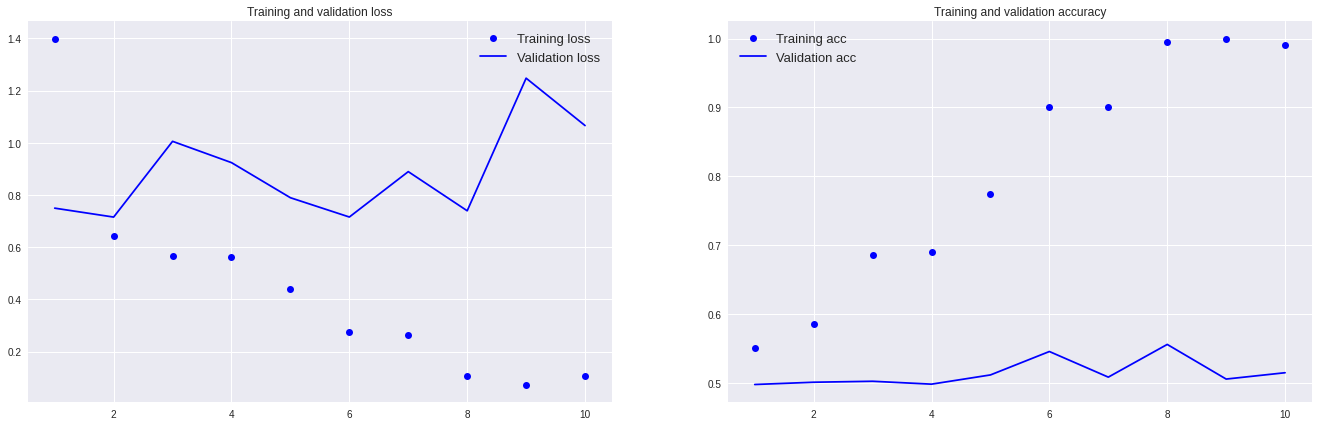

In [96]:
# 훈련 샘플 수가 작기 때문에 과대적합이 빠르게 시작

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig = plt.figure(figsize = (23, 7))

fig.add_subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(fontsize = 13)

fig.add_subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(fontsize = 13)

plt.show()

In [97]:
# 테스트 데이터 토큰화하기

test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=max_len)
y_test = np.asarray(labels)

In [98]:
model.load_weights('/content/drive/MyDrive/workspace/cakd5/m9_딥러닝 알고리즘 구현/자연어 처리 (NLP)/pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 1.0817 - acc: 0.5142


[1.0816587209701538, 0.514240026473999]

### # 사전 훈련된 임베딩을 사용하지 않고 같은 모델 훈련
---

In [99]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(num_words, embedding_dim, input_length = max_len))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_7 (Flatten)         (None, 10000)             0         
                                                                 
 dense_13 (Dense)            (None, 32)                320032    
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 146ms/step - loss: 0.6973 - acc: 0.5150 - val_loss: 0.6924 - val_acc: 0.5109
Epoch 2/10
7/7 [==============================

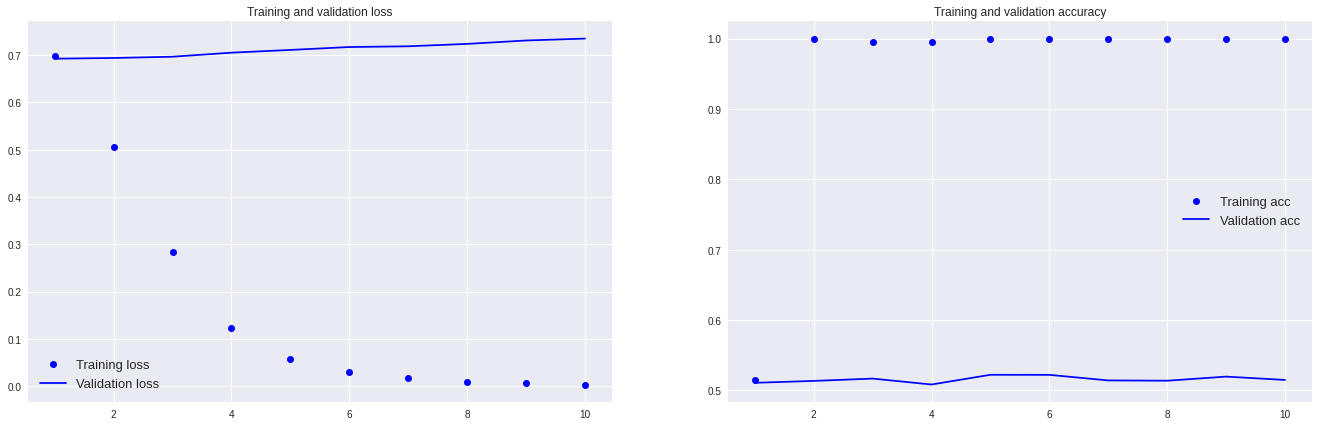

In [100]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig = plt.figure(figsize = (23, 7))

fig.add_subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(fontsize = 13)

fig.add_subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(fontsize = 13)

plt.show()

### # 훈련 샘플 수를 2000개로 늘려서 모델링 및 시각화
---

In [101]:
max_len = 100
num_words = 10000
training_samples = 2000
validation_samples = 10000

tokenizer = Tokenizer(num_words = num_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print(f'{len(word_index)}개의 고유한 토큰을 찾았습니다.')

data = pad_sequences(sequences, maxlen = max_len)

labels = np.asarray(labels)
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

# 라벨이 0부터 순서대로 있으므로 랜덤으로 섞어준다
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples : training_samples + validation_samples]
y_val = labels[training_samples : training_samples + validation_samples]

87393개의 고유한 토큰을 찾았습니다.
데이터 텐서의 크기: (25000, 100)
레이블 텐서의 크기: (25000,)


In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(num_words, embedding_dim, input_length = max_len))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/10
63/63 [==============================] - 2s 19ms/step - loss: 0.6892 - acc: 0.5355 - val_loss: 0.6735 - val_acc: 0.6230
Epoch 2/10
63/63 [==============================] - 1s 14ms/step - loss: 0.3734 - acc: 0.9470 - val_loss: 0.5632 - val_acc: 0.7080
Epoch 3/10
63/63 [==============================] - 1s 11ms/step - loss: 0.0667 - acc: 0.9915 - val_loss: 0.5270 - val_acc: 0.7374
Epoch 4/10
63/63 [==============================] - 1s 14ms/step - loss: 0.0078 - acc: 1.0000 - val_loss: 0.5598 - val_acc: 0.7398
Epoch 5/10
63/63 [==============================] - 1s 12ms/step - loss: 8.1546e-04 - acc: 1.0000 - val_loss: 0.8957 - val_acc: 0.6872
Epoch 6/10
63/63 [==============================] - 1s 12ms/step - loss: 5.6687e-04 - acc: 0.9995 - val_loss: 0.5904 - val_acc: 0.7611
Epoch 7/10
63/63 [==============================] - 1s 14ms/step - loss: 1.4751e-05 - acc: 1.0000 - val_loss: 0.6463 - val_acc: 0.7597
Epoch 8/10
63/63 [==============================] - 1s 14ms/step - loss

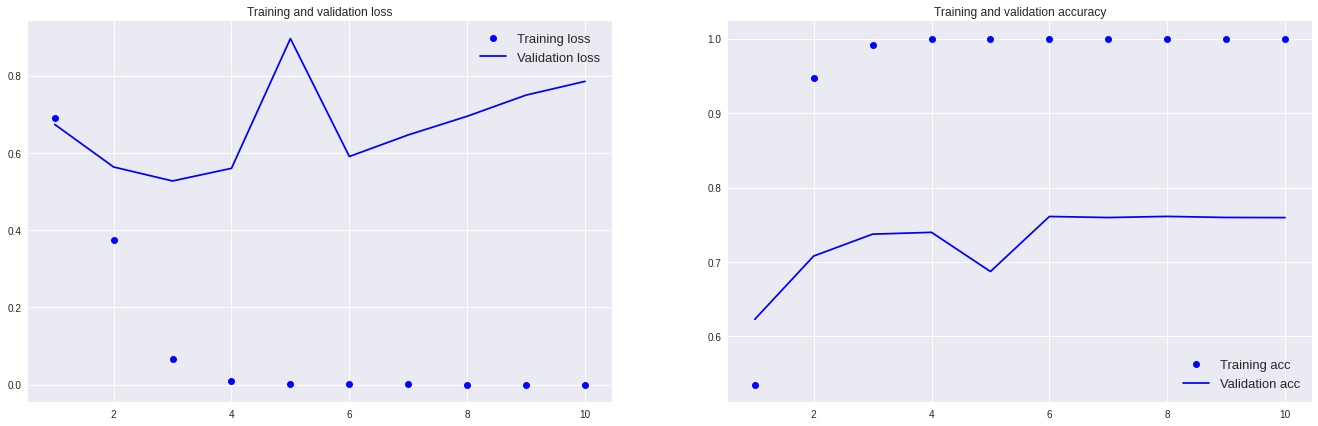

In [108]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig = plt.figure(figsize = (23, 7))

fig.add_subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(fontsize = 13)

fig.add_subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(fontsize = 13)

plt.show()